In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import quandl as ql
import hvplot.pandas
import plotly.express as px
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Joseph\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#Getting CFTC data from Quandl
ql.ApiConfig.api_key = 'tJdgrzhuFvMvkw--DdYw'
GOLD_data = ql.get('CFTC/088691_FO_L_ALL')
GOLD_data.tail()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
2020-06-16,910794.0,299684.0,57187.0,274038.0,275372.0,553171.0,849094.0,884396.0,61700.0,26398.0
2020-06-23,1004682.0,335264.0,59738.0,308051.0,292136.0,604248.0,935451.0,972036.0,69230.0,32645.0
2020-06-30,990185.0,355678.0,65306.0,291233.0,273880.0,600793.0,920791.0,957333.0,69394.0,32852.0
2020-07-07,1008422.0,366449.0,73204.0,293320.0,278128.0,608270.0,937897.0,974793.0,70524.0,33628.0
2020-07-14,1016765.0,358149.0,69220.0,300720.0,286264.0,616390.0,945133.0,986330.0,71632.0,30436.0


In [4]:
#Clean Data
GOLD_data = GOLD_data.drop(columns=["Open Interest", 
                                  "Noncommercial Spreads", 
                                  "Commercial Long", 
                                  "Commercial Short", 
                                  "Total Long",
                                  "Total Short",
                                  "Nonreportable Positions Long", 
                                  "Nonreportable Positions Short"])
GOLD_data.head()

,Noncommercial Long,Noncommercial Short
Date,,
1995-03-21,17167.0,11285.0
1995-03-28,14551.0,11466.0
1995-04-04,47565.0,4359.0
1995-04-18,53491.0,4571.0
1995-04-25,46462.0,4135.0


In [5]:
#Calculate Net Data
GOLD_data["Net Noncommercial Futures/Options"] = GOLD_data["Noncommercial Long"] - GOLD_data["Noncommercial Short"]
GOLD_data.tail()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
2020-06-16,299684.0,57187.0,242497.0
2020-06-23,335264.0,59738.0,275526.0
2020-06-30,355678.0,65306.0,290372.0
2020-07-07,366449.0,73204.0,293245.0
2020-07-14,358149.0,69220.0,288929.0


In [6]:
#Calculate mean and std
Average = GOLD_data["Net Noncommercial Futures/Options"].mean()
x = np.array(GOLD_data["Net Noncommercial Futures/Options"])
std = x.std()

z_score_historical = ((GOLD_data["Net Noncommercial Futures/Options"][-1]) - Average)/std
z_score_historical

1.8447534119807287

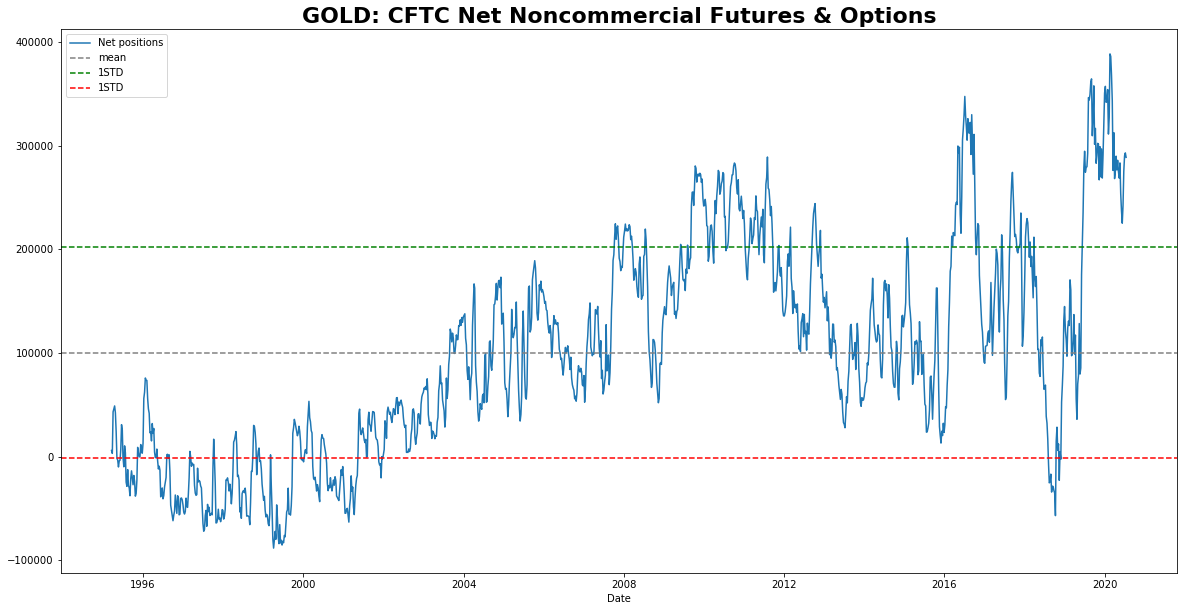

In [8]:
#Plot GOLD CFTC data
def create_plot(data):
    x = GOLD_data.index
    y = GOLD_data["Net Noncommercial Futures/Options"]
    std_positive = (Average + std)
    std_negative = (Average - std)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"GOLD: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(GOLD_data["Net Noncommercial Futures/Options"])

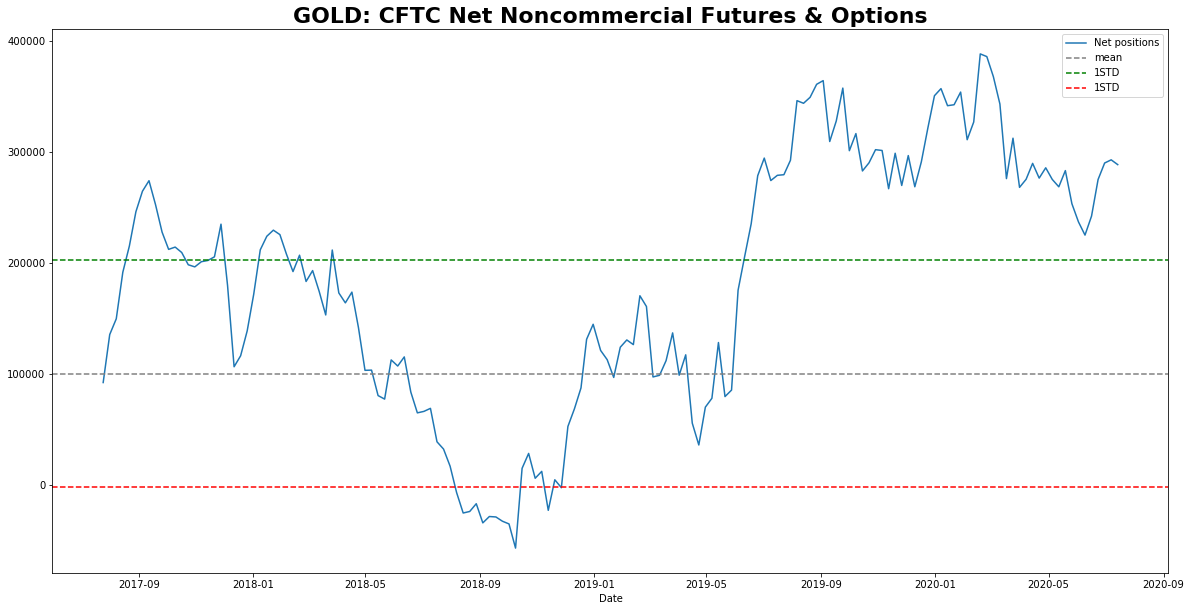

In [9]:
##Plot EUR CFTC data last 3 years
def create_plot(data):
    x = GOLD_data.index[-156:]
    y = GOLD_data["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average + std)
    std_negative = (Average - std)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"GOLD: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(GOLD_data["Net Noncommercial Futures/Options"][-156:])


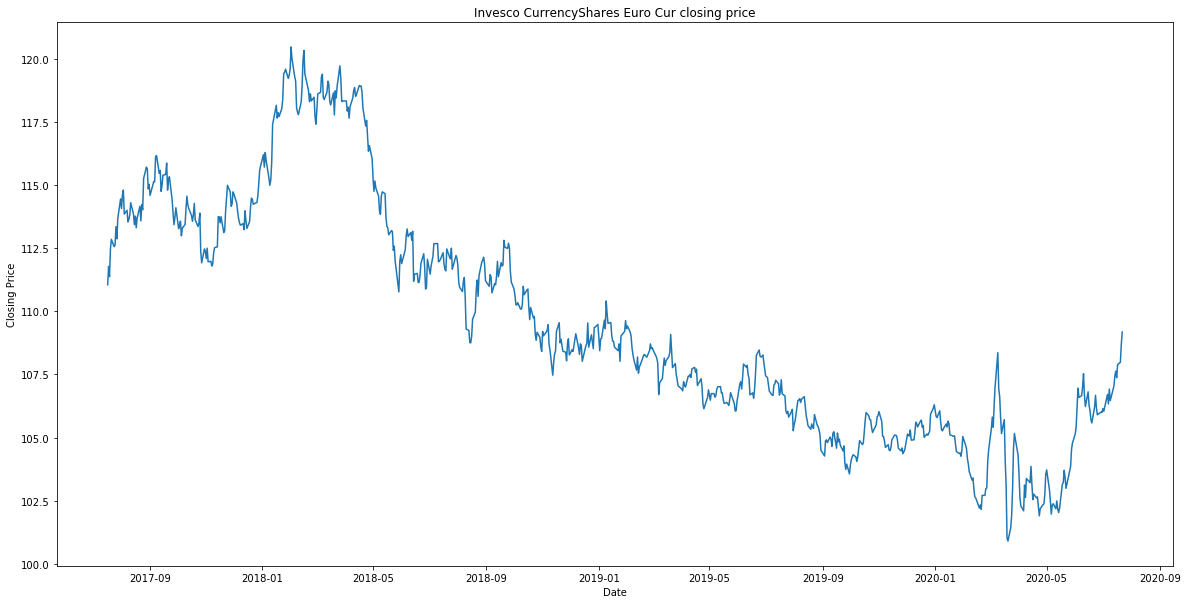

In [10]:
# Plotting Price action
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2017-07-15', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{ticker_data.info['shortName']} closing price")
    
create_plot('FXE')

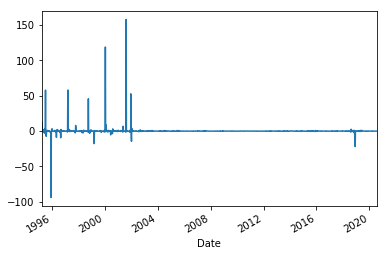

In [11]:
# Calculating changes in CFTC data
GOLD_data_changes = GOLD_data.pct_change()
GOLD_data_changes = GOLD_data_changes.dropna()
GOLD_data_changes["Net Noncommercial Futures/Options"].plot()